In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import plotly.express as px
from matplotlib.patches import Patch
from matplotlib import cm, colors as mcolors
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

2025-09-21 20:18:32.221226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Data

In [28]:
X = np.load("Descriptor1_complete_features.npy")  
y = np.load("Descriptor1_complete_targets.npy")  

print("X shape:", X.shape)
print("y shape:", y.shape)

#X = X[:, :-3]   # remove last 3 cols (charge/spin/size)

print("\nX shape:", X.shape)  
print("y shape:", y.shape)

X shape: (1452, 147)
y shape: (1452,)

X shape: (1452, 147)
y shape: (1452,)


In [29]:
# scale data 
X_scaled = StandardScaler().fit_transform(X)

# Numeric labels
classes = np.unique(y)
label_to_idx = {lbl: i for i, lbl in enumerate(classes)}
c_idx = np.array([label_to_idx[v] for v in y])

# PCA

2D explained variance ratio: [0.13314707 0.095323  ]
3D explained variance ratio: [0.13314707 0.095323   0.08464201]


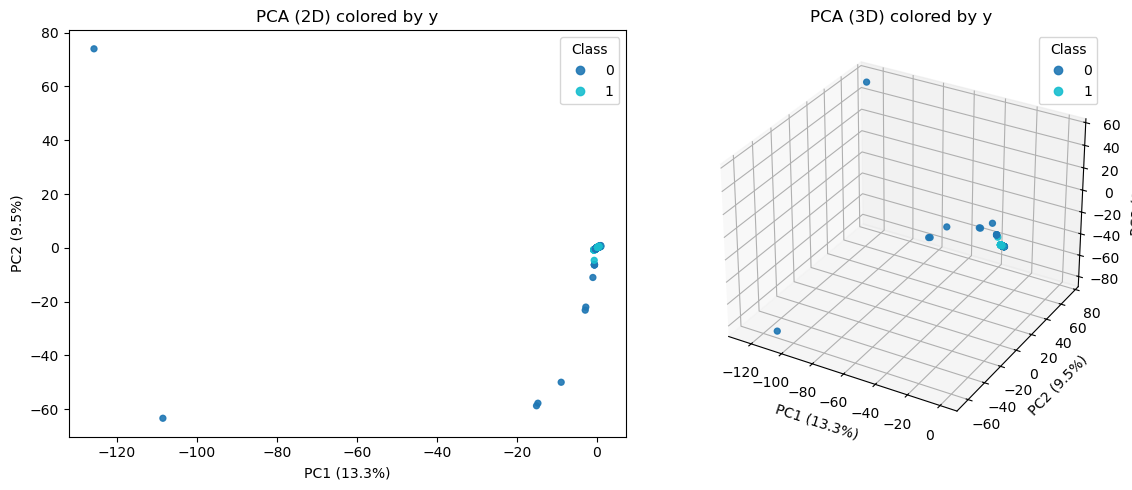

In [9]:
fig = plt.figure(figsize=(12,5))

# --- PCA 2D ---
pca2 = PCA(n_components=2, random_state=42)
Z2 = pca2.fit_transform(X_scaled)
print("2D explained variance ratio:", pca2.explained_variance_ratio_)

ax1 = fig.add_subplot(1, 2, 1)
sc1 = ax1.scatter(Z2[:,0], Z2[:,1], c=c_idx, cmap="tab10", s=18, alpha=0.9)
ax1.set_xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)")
ax1.set_ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)")
ax1.set_title("PCA (2D) colored by y")
handles, labels = sc1.legend_elements(prop="colors", alpha=0.9)
ax1.legend(handles, [str(cls) for cls in classes], title="Class", loc="best")

# --- PCA 3D ---
pca3 = PCA(n_components=3, random_state=42)
Z3 = pca3.fit_transform(X_scaled)
print("3D explained variance ratio:", pca3.explained_variance_ratio_)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
sc2 = ax2.scatter(Z3[:,0], Z3[:,1], Z3[:,2], c=c_idx, cmap="tab10", s=18, alpha=0.9)
ax2.set_xlabel(f"PC1 ({pca3.explained_variance_ratio_[0]*100:.1f}%)")
ax2.set_ylabel(f"PC2 ({pca3.explained_variance_ratio_[1]*100:.1f}%)")
ax2.set_zlabel(f"PC3 ({pca3.explained_variance_ratio_[2]*100:.1f}%)")
ax2.set_title("PCA (3D) colored by y")
handles, labels = sc2.legend_elements(prop="colors", alpha=0.9)
ax2.legend(handles, [str(cls) for cls in classes], title="Class", loc="best")

plt.tight_layout()
plt.show()

# T-sne

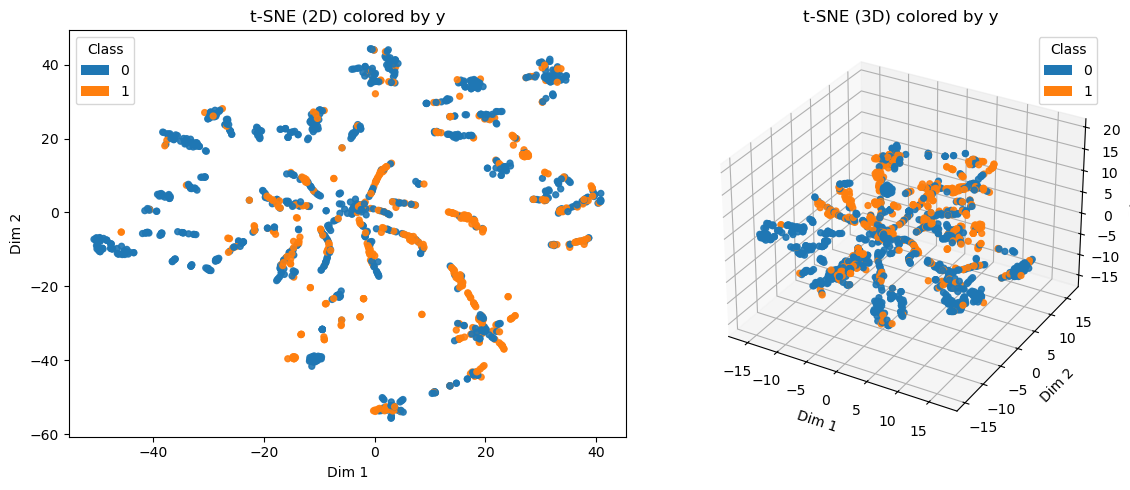

In [10]:
base = plt.get_cmap("tab20" if len(classes) > 10 else "tab10").colors
colors = [base[i % len(base)] for i in range(len(classes))]
cmap = ListedColormap(colors)

n_samples = X.shape[0]
perp = 30

fig = plt.figure(figsize=(12, 5))

# 2D t-SNE
tsne2 = TSNE(n_components=2, perplexity=perp, init="pca", learning_rate="auto",random_state=42)
Z2 = tsne2.fit_transform(X_scaled)
ax1 = fig.add_subplot(1, 2, 1)
sc1 = ax1.scatter(Z2[:, 0], Z2[:, 1], c=c_idx, cmap=cmap, vmin=0, vmax=len(classes)-1,
                  s=18, alpha=0.9)
ax1.set_title("t-SNE (2D) colored by y")
ax1.set_xlabel("Dim 1")
ax1.set_ylabel("Dim 2")
legend_handles = [Patch(label=str(cls), facecolor=colors[i]) for i, cls in enumerate(classes)]
ax1.legend(handles=legend_handles, title="Class", loc="best", frameon=True)

#  3D t-SNE
tsne3 = TSNE(n_components=3, perplexity=perp, init="pca", learning_rate="auto",random_state=42)
Z3 = tsne3.fit_transform(X_scaled)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
sc2 = ax2.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], c=c_idx, cmap=cmap, vmin=0, vmax=len(classes)-1,
                  s=18, alpha=0.9)
ax2.set_title("t-SNE (3D) colored by y")
ax2.set_xlabel("Dim 1")
ax2.set_ylabel("Dim 2")
ax2.set_zlabel("Dim 3")
ax2.legend(handles=legend_handles, title="Class", loc="best", frameon=True)

plt.tight_layout()
plt.show()

# TSNE 3D 

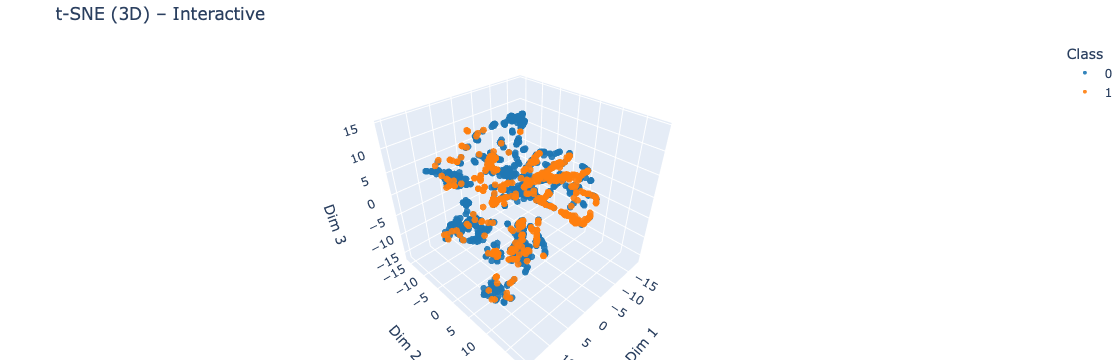

In [ ]:
#  dataframe for Plotly 
df_plot = pd.DataFrame({
    "x": Z3[:, 0],
    "y": Z3[:, 1],
    "z": Z3[:, 2],
    "label": [str(v) for v in y]  
})

mpl_base = cm.get_cmap("tab20" if len(classes) > 10 else "tab10").colors
mpl_colors = [mcolors.to_hex(mpl_base[i % len(mpl_base)]) for i in range(len(classes))]
color_map = {str(cls): mpl_colors[i] for i, cls in enumerate(classes)}

fig = px.scatter_3d(
    df_plot, x="x", y="y", z="z",
    color="label",
    color_discrete_map=color_map,
    opacity=0.9,
    title="t-SNE (3D) – Interactive"
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(
    legend_title_text="Class",
    scene=dict(xaxis_title="Dim 1",yaxis_title="Dim 2",zaxis_title="Dim 3", aspectmode="data"),
    margin=dict(l=0, r=0, t=40, b=0))

fig.show()

# UMAP

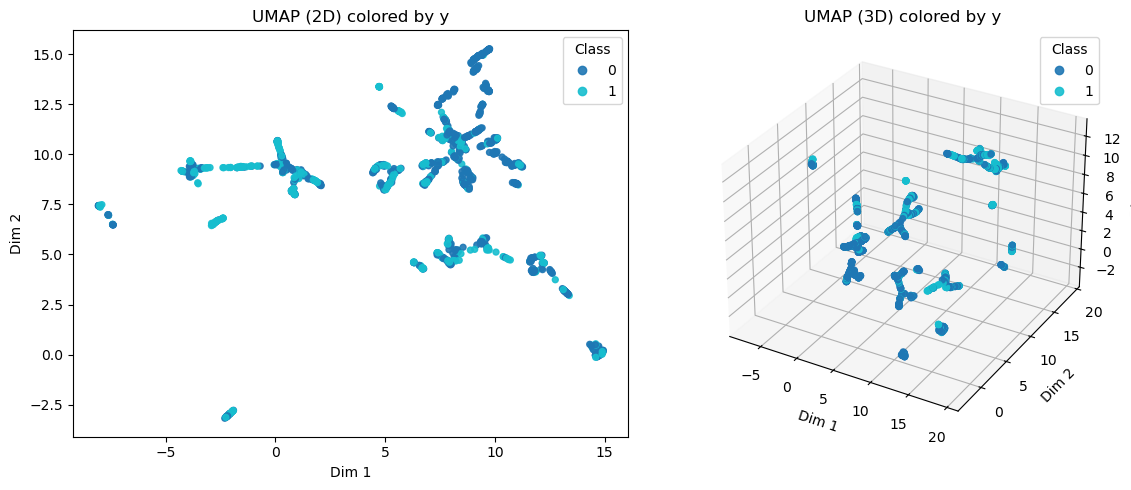

In [31]:
fig = plt.figure(figsize=(12, 5))

# --- 2D ---
umap2 = umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.05,
                  metric="euclidean", random_state=42)
Z2 = umap2.fit_transform(X_scaled)
ax1 = fig.add_subplot(1, 2, 1)
sc1 = ax1.scatter(Z2[:, 0], Z2[:, 1], c=c_idx, cmap="tab10", s=18, alpha=0.9, vmin=0, vmax=len(classes)-1)
ax1.set_title("UMAP (2D) colored by y")
ax1.set_xlabel("Dim 1")
ax1.set_ylabel("Dim 2")
handles, _ = sc1.legend_elements(prop="colors", alpha=0.9)
ax1.legend(handles, [str(c) for c in classes], title="Class", loc="best")

# --- 3D ---
umap3 = umap.UMAP(n_components=3, n_neighbors=20, min_dist=0.05,
                  metric="euclidean", random_state=42)
Z3 = umap3.fit_transform(X_scaled)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
sc2 = ax2.scatter(Z3[:, 0], Z3[:, 1], Z3[:, 2], c=c_idx, cmap="tab10", s=18, alpha=0.9, vmin=0, vmax=len(classes)-1)
ax2.set_title("UMAP (3D) colored by y")
ax2.set_xlabel("Dim 1")
ax2.set_ylabel("Dim 2")
ax2.set_zlabel("Dim 3")
handles, _ = sc2.legend_elements(prop="colors", alpha=0.9)
ax2.legend(handles, [str(c) for c in classes], title="Class", loc="best")

plt.tight_layout()
plt.show()


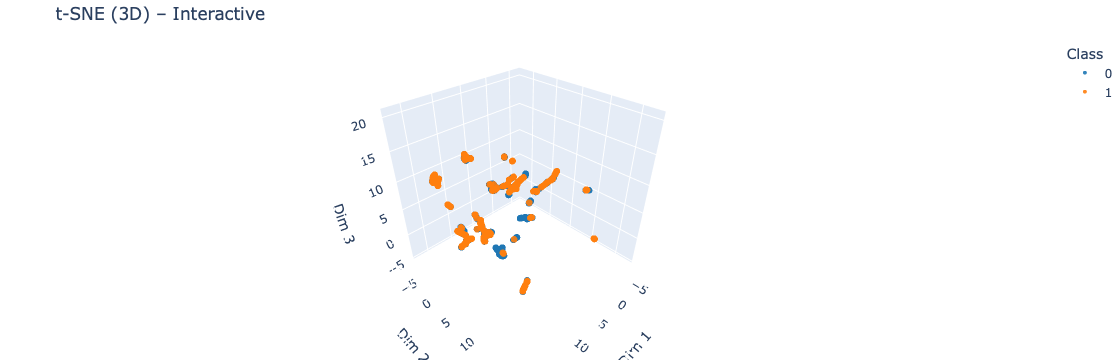

In [ ]:
# dataframe for Plotly 
df_plot = pd.DataFrame({"x": Z3[:, 0],
                        "y": Z3[:, 1],
                        "z": Z3[:, 2],
                        "label": [str(v) for v in y] 
})

mpl_base = cm.get_cmap("tab20" if len(classes) > 10 else "tab10").colors
mpl_colors = [mcolors.to_hex(mpl_base[i % len(mpl_base)]) for i in range(len(classes))]
color_map = {str(cls): mpl_colors[i] for i, cls in enumerate(classes)}

fig = px.scatter_3d(df_plot, x="x", y="y", z="z",
                    color="label",
                    color_discrete_map=color_map,
                    opacity=0.9,
                    title="t-SNE (3D) – Interactive"
)

# larger style
fig.update_traces(marker=dict(size=4))
fig.update_layout(legend_title_text="Class",
    scene=dict(xaxis_title="Dim 1",yaxis_title="Dim 2",zaxis_title="Dim 3", aspectmode="data"),
    margin=dict(l=0, r=0, t=40, b=0))

fig.show()

# LDA

Test Accuracy: 0.7697594501718213
Test F1-macro: 0.7123530192826899
              precision    recall  f1-score   support

           0     0.7797    0.9124    0.8409       194
           1     0.7344    0.4845    0.5839        97

    accuracy                         0.7698       291
   macro avg     0.7571    0.6985    0.7124       291
weighted avg     0.7646    0.7698    0.7552       291

Confusion matrix:
 [[177  17]
 [ 50  47]]


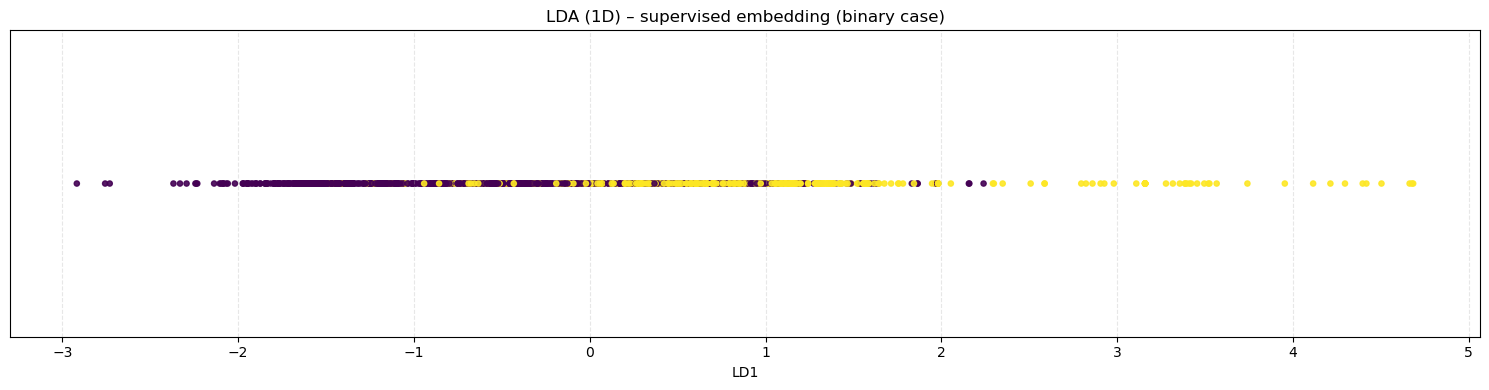

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# split 
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  LDA classifier 
lda_clf = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto"))
])
lda_clf.fit(X_tr, y_tr)

# Eval
y_pred = lda_clf.predict(X_te)
print("Test Accuracy:", accuracy_score(y_te, y_pred))
print("Test F1-macro:", f1_score(y_te, y_pred, average="macro"))
print(classification_report(y_te, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))

lda_dr = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis(n_components=1, solver="svd"))
])

Z = lda_dr.fit(X, y).transform(X)  # shape: (n_samples, 1)

plt.figure(figsize=(15,4))
plt.scatter(Z[:, 0], [0]*len(Z), c=y, s=14, alpha=0.9)
plt.yticks([])
plt.xlabel("LD1")
plt.title("LDA (1D) – supervised embedding (binary case)")
plt.grid(True, ls="--", alpha=0.3)
plt.tight_layout()
plt.show()